In [1]:
# Import necessary Libraries
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=RuntimeWarning)

import numpy as np
np.seterr(divide='ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [2]:
tractor_ds = pd.read_excel(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Tractor_Indicators_2023.xlsx")

In [3]:
tractor_ds.head()

,Date,Total Sales Tractor,Domestic cargo/freight handled,MSP Kharif Season,MSP Rabi Season,MOM:Live storage at full reservoir level (FRL),MOM:Current live storage,"MOM:Current live storage ,As % of live storage at FRL",Rainfall in mm,Rainfall in mm_lag1,...,Growth YoY%,GVA Gross Value Add,GVA Agriculture,Mining,Manufacturing,Electricity,Construction,Trade,Real estate,Social and personal services
0,2011-07-01,52219,85.6,1000,1120,151.8,58.7,33.12,131.8,204.2,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
1,2011-08-01,71223,97.4,1000,1120,151.8,58.7,33.12,42.3,131.8,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
2,2011-09-01,52367,86.7,1000,1120,151.8,58.7,33.12,39.9,42.3,...,6.68,6.377357e+06,8.969137e+05,189891.233333,1.110348e+06,154886.833333,607395.833333,1.134989e+06,1.368753e+06,885903.866667
3,2011-10-01,35584,87.8,1000,1120,151.8,58.7,33.12,15.4,39.9,...,6.18,6.912985e+06,1.669885e+06,216162.633333,1.112248e+06,155409.833333,630319.266667,1.163190e+06,1.134477e+06,809198.900000
4,2011-11-01,40231,84.6,1000,1120,151.8,58.7,33.12,7.8,15.4,...,6.18,6.912985e+06,1.669885e+06,216162.633333,1.112248e+06,155409.833333,630319.266667,1.163190e+06,1.134477e+06,809198.900000


In [4]:
tractor_ds.set_index("Date",inplace=True)

In [5]:
tractor_ds.describe()

,Total Sales Tractor,Domestic cargo/freight handled,MSP Kharif Season,MSP Rabi Season,MOM:Live storage at full reservoir level (FRL),MOM:Current live storage,"MOM:Current live storage ,As % of live storage at FRL",Rainfall in mm,Rainfall in mm_lag1,SI_Total Sales Tractor1,...,Growth YoY%,GVA Gross Value Add,GVA Agriculture,Mining,Manufacturing,Electricity,Construction,Trade,Real estate,Social and personal services
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,1.380000e+02,1.380000e+02,138.000000,1.380000e+02,138.000000,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02
mean,65105.731884,100.961353,1504.608696,1624.782609,161.423913,70.676087,42.612101,86.594010,87.975169,1.022226,...,5.271932,1.066645e+07,1.793934e+06,287429.436232,1.789898e+06,262009.567391,9.794454e+05,1.910599e+06,2.313842e+06,1.441750e+06
std,23781.419256,16.204568,284.120578,270.103298,8.077124,33.696463,19.057338,91.142325,91.471678,0.208130,...,5.820988,3.787851e+06,8.164108e+05,88925.298114,5.296924e+05,126797.873233,2.888863e+05,6.394495e+05,9.149918e+05,6.370370e+05
min,12456.000000,8.000000,1000.000000,1120.000000,151.800000,26.300000,16.220000,2.900000,2.900000,0.747145,...,-29.290000,6.377357e+06,8.969137e+05,185394.133333,1.110348e+06,154886.833333,5.835635e+05,1.114280e+06,1.134477e+06,8.091989e+05
25%,47193.000000,94.400000,1310.000000,1400.000000,155.000000,50.800000,31.060000,27.200000,28.150000,0.905978,...,5.223333,7.923846e+06,1.225861e+06,227553.691667,1.329344e+06,173488.266667,7.722997e+05,1.423721e+06,1.649609e+06,9.729866e+05
50%,59750.000000,102.283333,1470.000000,1625.000000,157.800000,55.000000,34.550000,36.753333,36.753333,0.953738,...,6.245000,9.562608e+06,1.525140e+06,265119.133333,1.706816e+06,215828.433333,9.066856e+05,1.816075e+06,2.021243e+06,1.216325e+06
75%,74573.000000,112.000000,1815.000000,1925.000000,170.900000,78.575000,45.015000,132.250000,132.625000,1.157263,...,7.590000,1.106073e+07,1.962265e+06,318831.566667,2.005124e+06,263879.716667,1.158005e+06,2.119079e+06,2.710084e+06,1.600357e+06
max,132413.000000,131.100000,1940.000000,2015.000000,177.500000,158.400000,90.000000,327.800000,327.800000,1.481294,...,10.786667,1.998879e+07,4.313515e+06,580850.500000,3.110668e+06,625937.600000,1.891312e+06,3.810171e+06,4.836027e+06,3.010941e+06


In [6]:
tractor_ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138 entries, 2011-07-01 to 2022-12-01
Data columns (total 44 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Total Sales Tractor                                      138 non-null    int64  
 1   Domestic cargo/freight handled                           138 non-null    float64
 2   MSP Kharif Season                                        138 non-null    int64  
 3   MSP Rabi Season                                          138 non-null    int64  
 4   MOM:Live storage at full  reservoir level  (FRL)         138 non-null    float64
 5   MOM:Current live storage                                 138 non-null    float64
 6   MOM:Current live storage ,As % of live storage  at FRL   138 non-null    float64
 7   Rainfall in mm                                           138 non-null    float64
 8   Rainfall in

In [7]:
tractor_ds.shape

(138, 44)

In [8]:
tractor_ds.isnull().sum()

Total Sales Tractor                                        0
Domestic cargo/freight handled                             0
MSP Kharif Season                                          0
MSP Rabi Season                                            0
MOM:Live storage at full  reservoir level  (FRL)           0
MOM:Current live storage                                   0
MOM:Current live storage ,As % of live storage  at FRL     0
Rainfall in mm                                             0
Rainfall in mm_lag1                                        0
SI_Total Sales Tractor1                                    0
Total Sales 2W                                             0
Total Sales 2W_lag1                                        0
Total negative flags                                       0
Total positive flags                                       0
FoodAGRO                                                   0
Food products                                              0
Consumer goods          

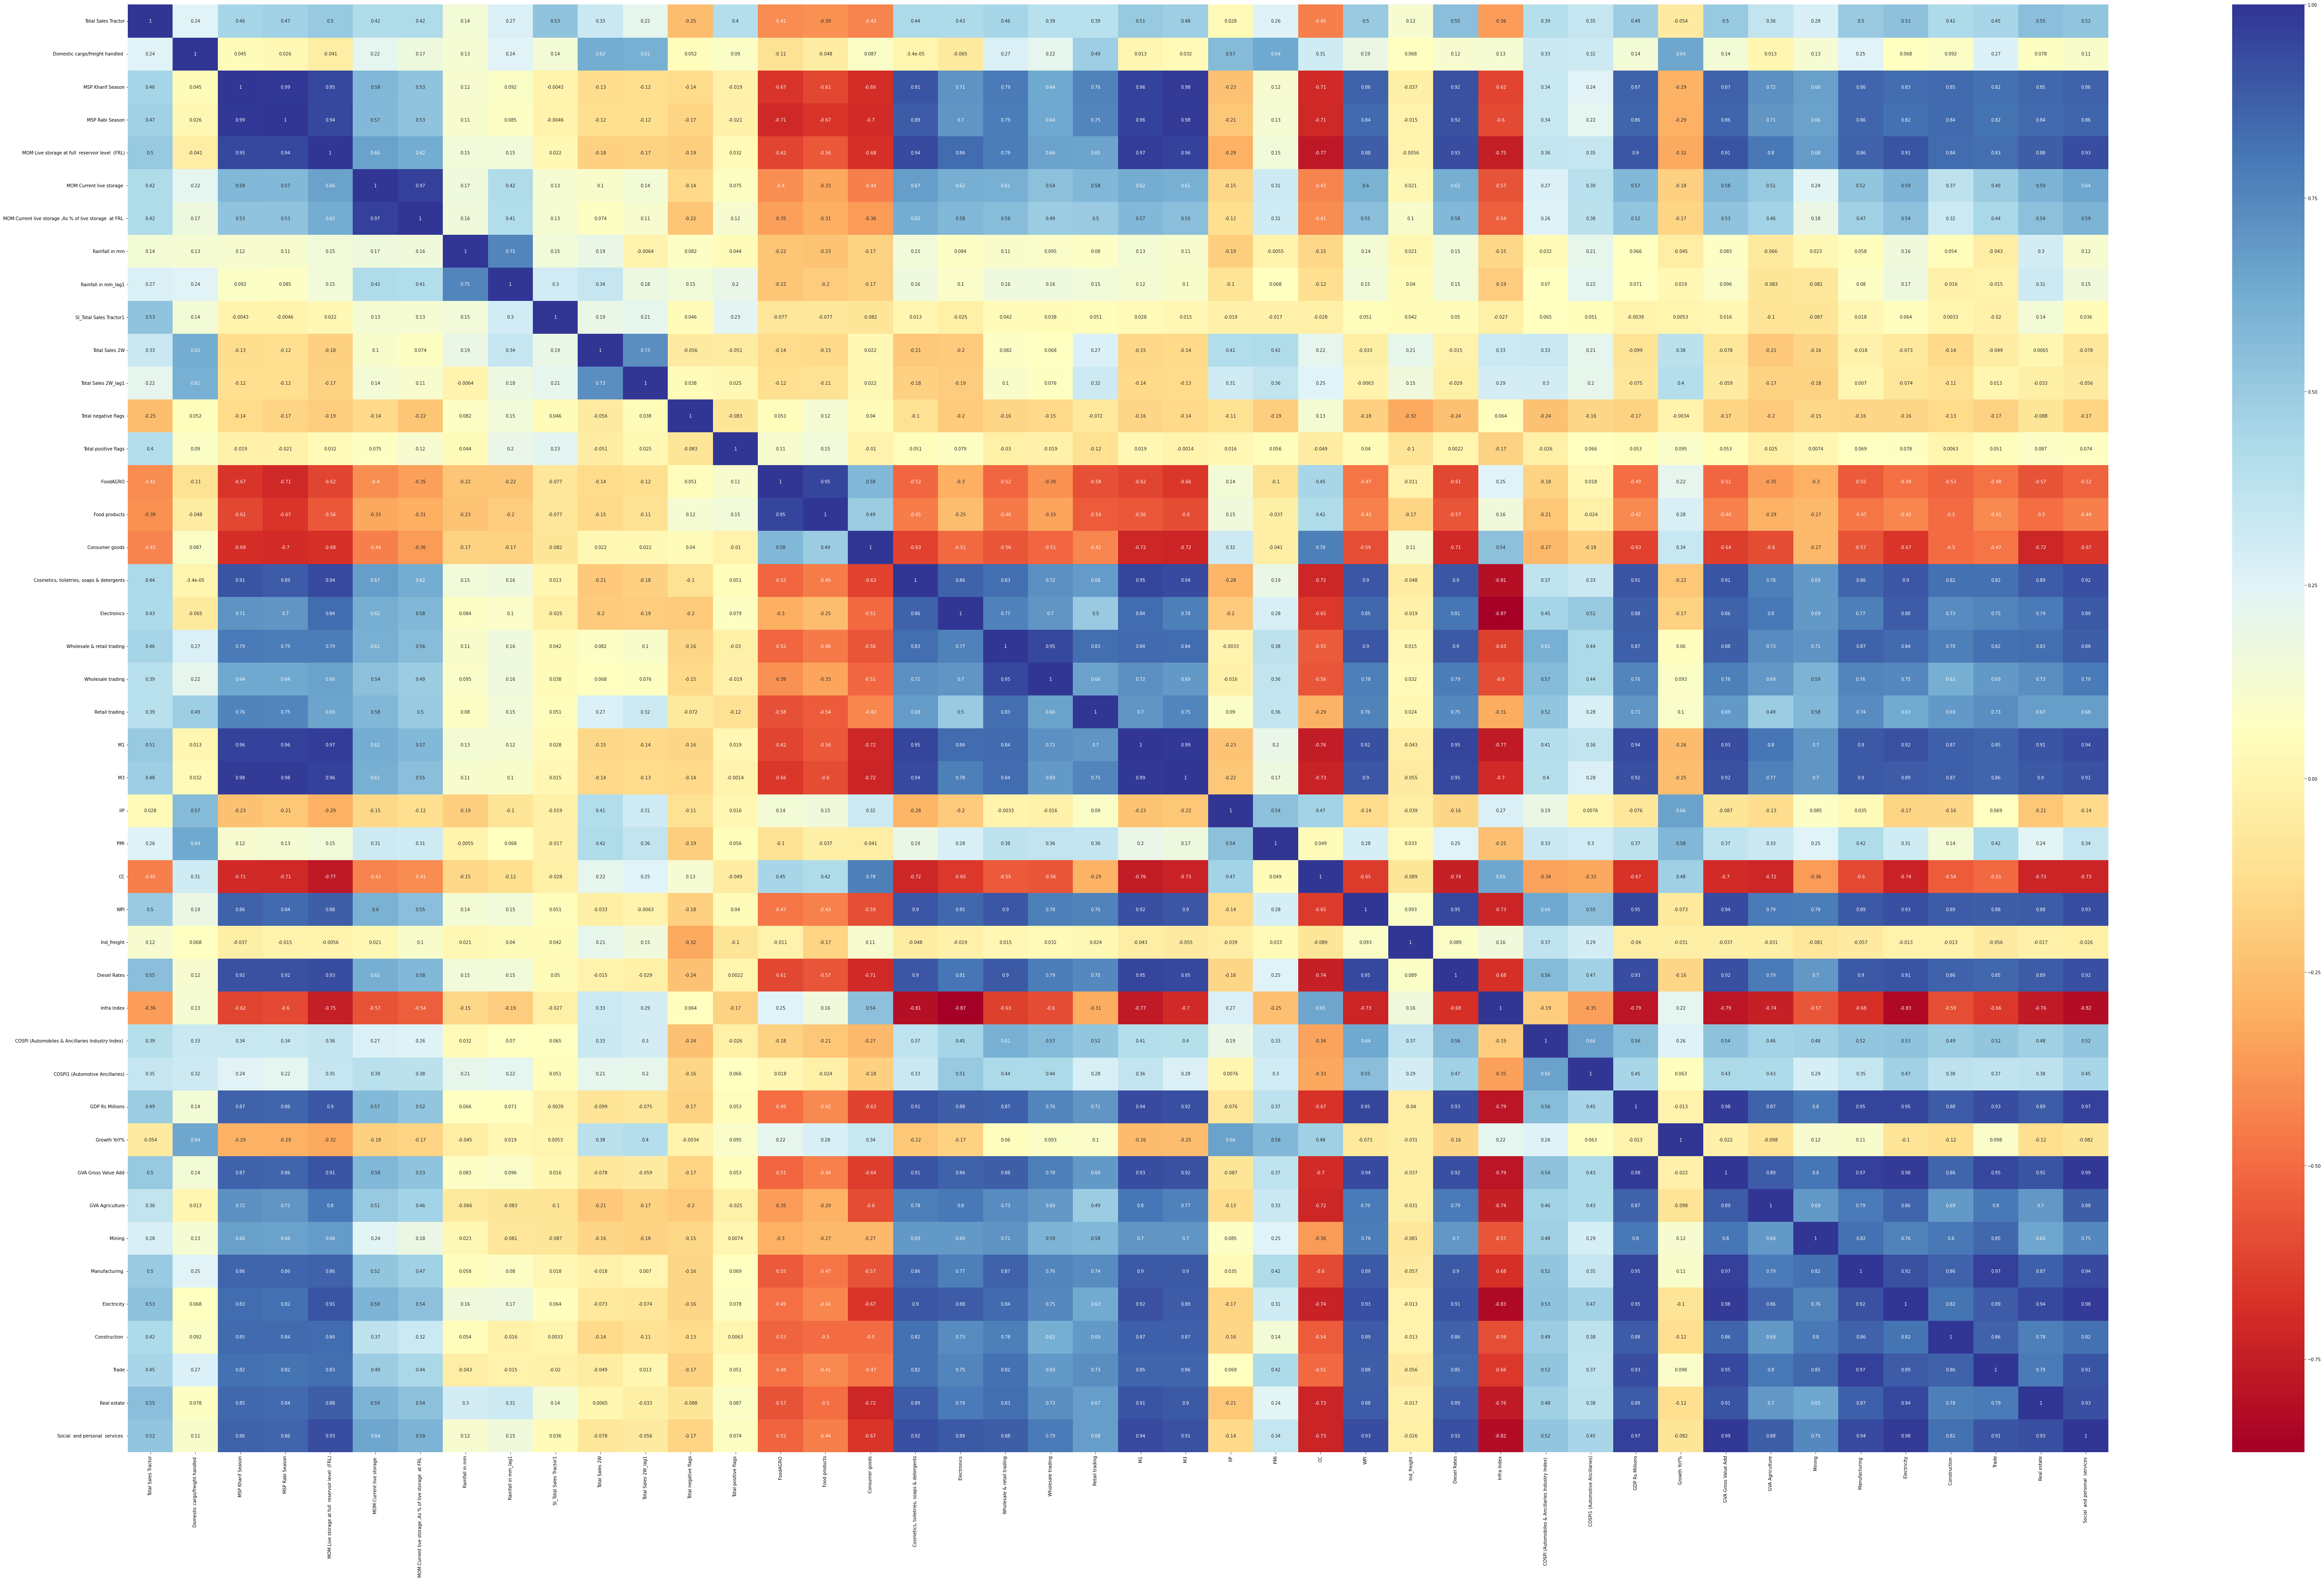

In [9]:
t_corr = tractor_ds.corr()
x,y = plt.subplots(figsize=(100,60))
sns.heatmap(t_corr,cmap='RdYlBu',yticklabels=t_corr.columns,annot=True)
plt.show()

In [10]:
tractor_ds.columns

Index(['Total Sales Tractor', 'Domestic cargo/freight handled ',
       'MSP Kharif Season', 'MSP Rabi Season',
       'MOM:Live storage at full  reservoir level  (FRL)',
       'MOM:Current live storage ',
       'MOM:Current live storage ,As % of live storage  at FRL ',
       'Rainfall in mm', 'Rainfall in mm_lag1', 'SI_Total Sales Tractor1',
       'Total Sales 2W', 'Total Sales 2W_lag1', 'Total negative flags',
       'Total positive flags', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading', 'Wholesale trading', 'Retail trading',
       'M1', 'M3', 'IIP', 'PMI', 'CC', 'WPI', 'Ind_freight', 'Diesel Rates',
       'Infra Index', 'COSPI (Automobiles & Ancillaries Industry Index) ',
       'COSPI1 (Automotive Ancillaries)', 'GDP Rs Millions', 'Growth YoY%',
       'GVA Gross Value Add', 'GVA Agriculture', 'Mining', 'Manufacturing ',
       'Electricity', 'Construction ', 'Trade', 'Real 

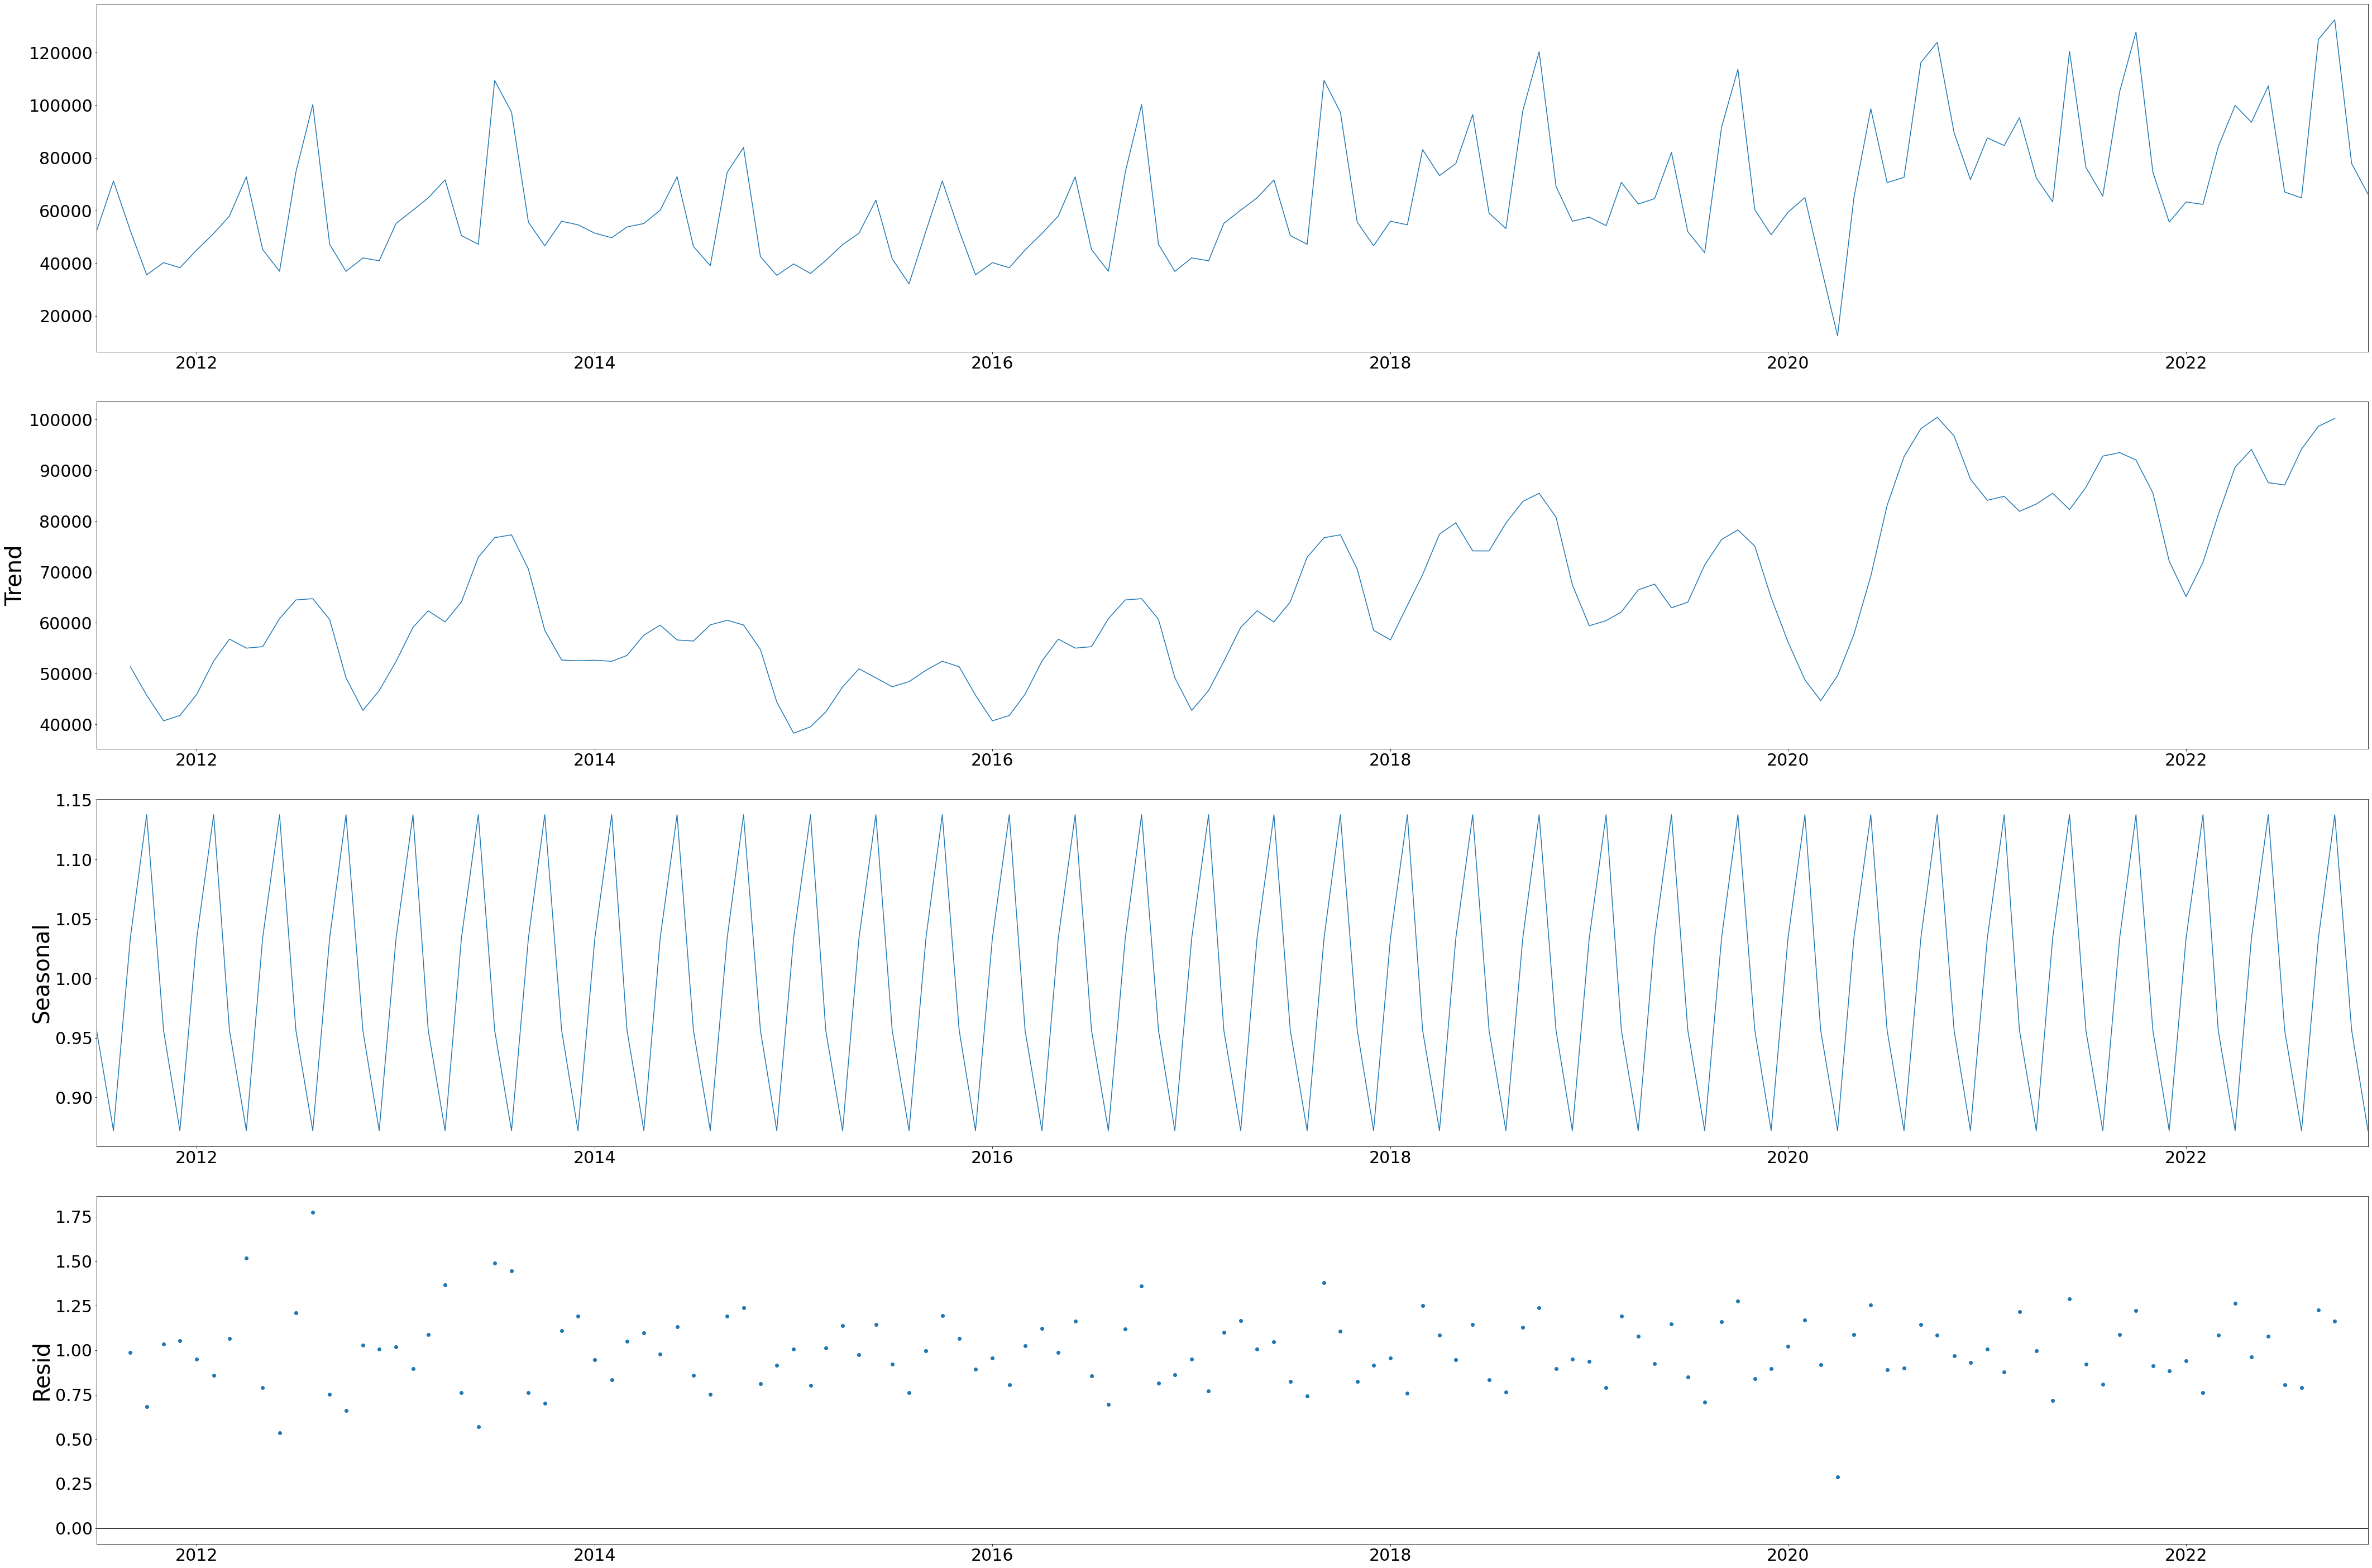

In [11]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
Tractor_Sales = tractor_ds[['Total Sales Tractor']]
result = seasonal_decompose(Tractor_Sales, model='multiplicative',period=4)
fig_size = plt.rcParams["figure.figsize"]
#plt.rcParams.update({'font.size': 22}
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30)
plt.rc('font', size=40)
fig_size[0] = 60
fig_size[1] = 40
result.plot(seasonal=True)
pyplot.show()

In [12]:
import dtale
dtale.show(tractor_ds)

In [13]:
import sweetviz as sv

tractor_report = sv.analyze(tractor_ds)
tractor_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
import pandas as pd
from pandas_profiling import ProfileReport

2023-05-12 09:45:46,237 - INFO     - Pandas backend loaded 1.5.2
2023-05-12 09:45:46,249 - INFO     - Numpy backend loaded 1.21.5
2023-05-12 09:45:46,261 - INFO     - Pyspark backend loaded 3.3.1
2023-05-12 09:45:46,261 - INFO     - Python backend loaded


In [15]:
#Tractor
Tractor_report = ProfileReport(tractor_ds)
Tractor_report.to_file(output_file ='Tractor_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Train and Test

In [16]:
# Tractor
tractor_ds.columns

Index(['Total Sales Tractor', 'Domestic cargo/freight handled ',
       'MSP Kharif Season', 'MSP Rabi Season',
       'MOM:Live storage at full  reservoir level  (FRL)',
       'MOM:Current live storage ',
       'MOM:Current live storage ,As % of live storage  at FRL ',
       'Rainfall in mm', 'Rainfall in mm_lag1', 'SI_Total Sales Tractor1',
       'Total Sales 2W', 'Total Sales 2W_lag1', 'Total negative flags',
       'Total positive flags', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading', 'Wholesale trading', 'Retail trading',
       'M1', 'M3', 'IIP', 'PMI', 'CC', 'WPI', 'Ind_freight', 'Diesel Rates',
       'Infra Index', 'COSPI (Automobiles & Ancillaries Industry Index) ',
       'COSPI1 (Automotive Ancillaries)', 'GDP Rs Millions', 'Growth YoY%',
       'GVA Gross Value Add', 'GVA Agriculture', 'Mining', 'Manufacturing ',
       'Electricity', 'Construction ', 'Trade', 'Real 

In [17]:
#Train and Test
X = tractor_ds.drop('Total Sales Tractor',axis = 1)
y = tractor_ds[['Total Sales Tractor']]

In [18]:
X.columns

Index(['Domestic cargo/freight handled ', 'MSP Kharif Season',
       'MSP Rabi Season', 'MOM:Live storage at full  reservoir level  (FRL)',
       'MOM:Current live storage ',
       'MOM:Current live storage ,As % of live storage  at FRL ',
       'Rainfall in mm', 'Rainfall in mm_lag1', 'SI_Total Sales Tractor1',
       'Total Sales 2W', 'Total Sales 2W_lag1', 'Total negative flags',
       'Total positive flags', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading', 'Wholesale trading', 'Retail trading',
       'M1', 'M3', 'IIP', 'PMI', 'CC', 'WPI', 'Ind_freight', 'Diesel Rates',
       'Infra Index', 'COSPI (Automobiles & Ancillaries Industry Index) ',
       'COSPI1 (Automotive Ancillaries)', 'GDP Rs Millions', 'Growth YoY%',
       'GVA Gross Value Add', 'GVA Agriculture', 'Mining', 'Manufacturing ',
       'Electricity', 'Construction ', 'Trade', 'Real estate',
       'Social  and p

In [19]:
y.columns

Index(['Total Sales Tractor'], dtype='object')

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
## This line instantiates the model. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,shuffle=False)

In [21]:
rf = RandomForestRegressor(n_estimators=20) 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_train, y_train)

0.9119709534002047

In [22]:
rf.score(X_test, y_test)

0.12304479155362946

<AxesSubplot: xlabel='rf_feature_importances_', ylabel='feature'>

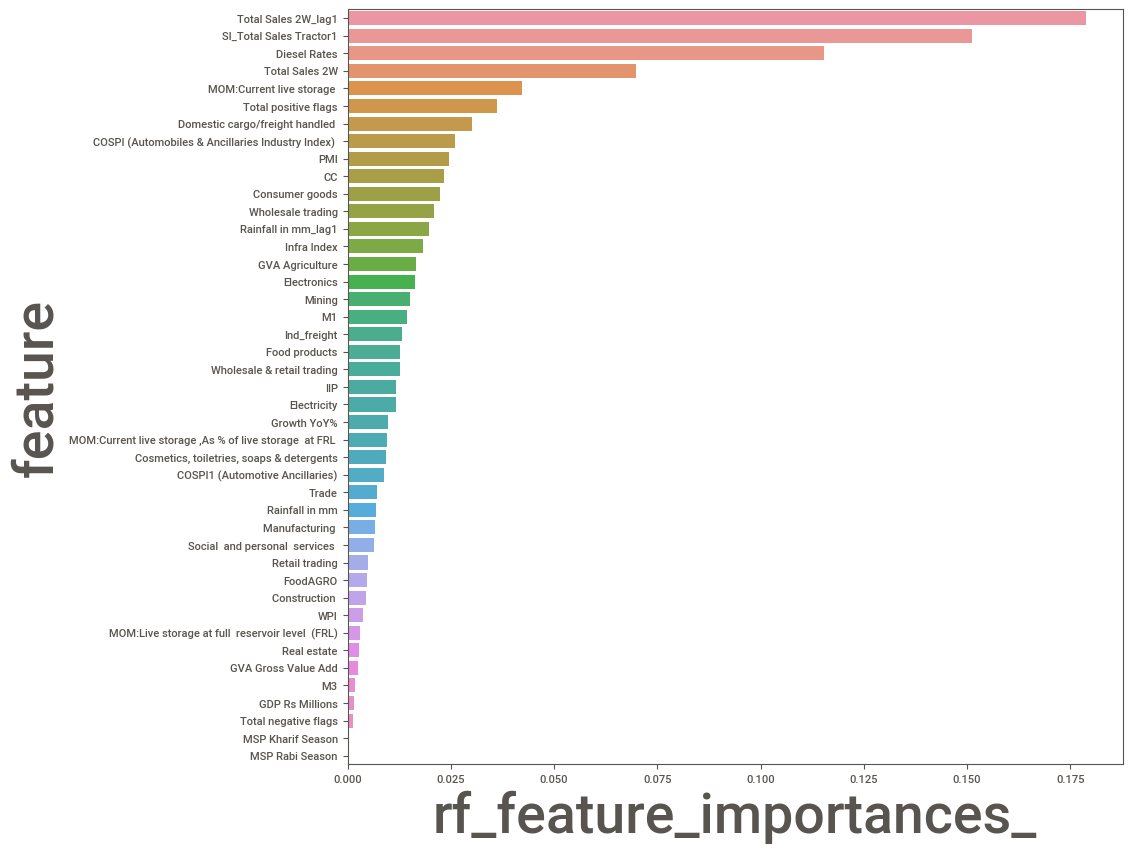

In [23]:
features_df = pd.DataFrame({'feature': X.columns,'rf_feature_importances_':rf.feature_importances_,})\
    .sort_values('rf_feature_importances_',ascending=False)\
    .reset_index()
#features_df.to_csv("HCV_RF2.csv")
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='rf_feature_importances_',y='feature',data=features_df)

In [24]:
param_test = {'max_depth':[3,5,7,8,9,10], 'min_samples_split':[2,3,4,5,6],
                'n_estimators':[100,200,400,600,800,1000], 'max_features': ['sqrt' , 'auto']}
gsearch = GridSearchCV(estimator = RandomForestRegressor(random_state=10),param_grid = param_test, scoring='r2',n_jobs=-1,cv=5)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 400, 600, 800, 1000]},
             scoring='r2')

In [25]:
mod1=RandomForestRegressor(min_samples_split =gsearch.best_params_['min_samples_split'],\
                          n_estimators = gsearch.best_params_['n_estimators'], max_depth = gsearch.best_params_['max_depth']\
                          ,max_features=gsearch.best_params_['max_features'] ,n_jobs = -1,random_state=10)\
                        .fit(X_train,y_train)

RandomForestRegressor()

RandomForestRegressor()

<AxesSubplot: xlabel='rf_feature_importances_', ylabel='feature'>

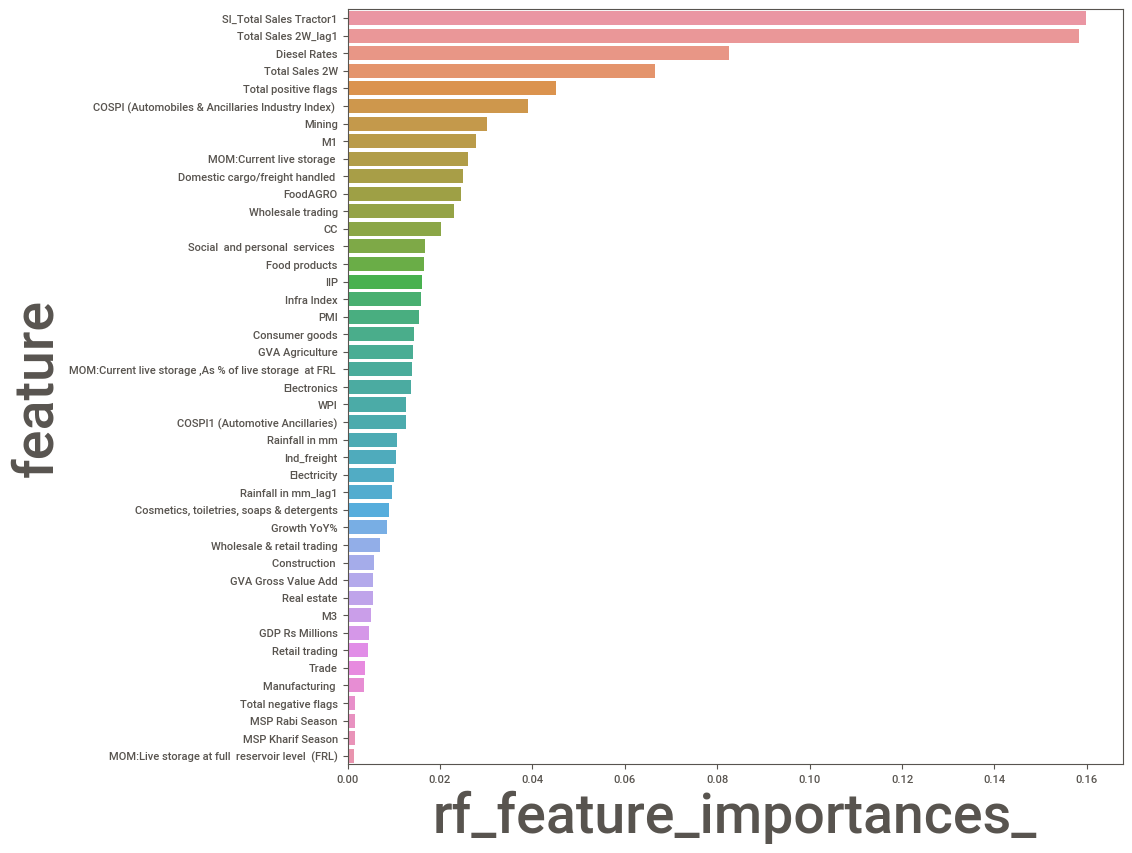

In [26]:
features_df = pd.DataFrame({'feature': X.columns,'rf_feature_importances_':mod1.feature_importances_,})\
    .sort_values('rf_feature_importances_',ascending=False)\
    .reset_index()
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='rf_feature_importances_',y='feature',data=features_df)

In [27]:
features_df.to_csv(r'C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Indicators/features_tractor.csv')

In [28]:
tractor_ds.columns

Index(['Total Sales Tractor', 'Domestic cargo/freight handled ',
       'MSP Kharif Season', 'MSP Rabi Season',
       'MOM:Live storage at full  reservoir level  (FRL)',
       'MOM:Current live storage ',
       'MOM:Current live storage ,As % of live storage  at FRL ',
       'Rainfall in mm', 'Rainfall in mm_lag1', 'SI_Total Sales Tractor1',
       'Total Sales 2W', 'Total Sales 2W_lag1', 'Total negative flags',
       'Total positive flags', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading', 'Wholesale trading', 'Retail trading',
       'M1', 'M3', 'IIP', 'PMI', 'CC', 'WPI', 'Ind_freight', 'Diesel Rates',
       'Infra Index', 'COSPI (Automobiles & Ancillaries Industry Index) ',
       'COSPI1 (Automotive Ancillaries)', 'GDP Rs Millions', 'Growth YoY%',
       'GVA Gross Value Add', 'GVA Agriculture', 'Mining', 'Manufacturing ',
       'Electricity', 'Construction ', 'Trade', 'Real 

In [29]:
var1 = ['Total Sales Tractor', 'Domestic cargo/freight handled ',
       'MSP Kharif Season', 'MSP Rabi Season',
       'MOM:Live storage at full  reservoir level  (FRL)',
       'MOM:Current live storage ',
       'MOM:Current live storage ,As % of live storage  at FRL ',
       'Rainfall in mm', 'Rainfall in mm_lag1', 'SI_Total Sales Tractor1',
       'Total Sales 2W', 'Total Sales 2W_lag1', 'Total negative flags',
       'Total positive flags', 'FoodAGRO', 'Food products', 'Consumer goods',
       'Cosmetics, toiletries, soaps & detergents', 'Electronics',
       'Wholesale & retail trading', 'Wholesale trading', 'Retail trading',
       'M1', 'M3', 'IIP', 'PMI', 'CC', 'WPI', 'Ind_freight', 'Diesel Rates',
       'Infra Index', 'COSPI (Automobiles & Ancillaries Industry Index) ',
       'COSPI1 (Automotive Ancillaries)', 'GDP Rs Millions', 'Growth YoY%',
       'GVA Gross Value Add', 'GVA Agriculture', 'Mining', 'Manufacturing ',
       'Electricity', 'Construction ', 'Trade', 'Real estate',
       'Social  and personal  services ']

In [572]:
var = ['Total Sales Tractor',
       'SI_Total Sales Tractor1',
       'Total Sales 2W', 'Total Sales 2W_lag1_sqrt','Wholesale trading','M1', 'Total negative flags',
       'Total positive flags','COSPI (Automobiles & Ancillaries Industry Index)_sqrt ']

In [573]:
tractor_ds['Total Sales 2W_lag1_sqrt'] = np.sqrt(tractor_ds['Total Sales 2W_lag1'])

In [574]:
#tractor_ds['Wholesale trading_log'] = np.log(tractor_ds['Wholesale trading'])

In [575]:
#tractor_ds['GVA Agriculture_sqrt'] = np.sqrt(tractor_ds['GVA Agriculture'])

In [576]:
tractor_ds['COSPI (Automobiles & Ancillaries Industry Index)_sqrt '] = np.sqrt(tractor_ds['COSPI (Automobiles & Ancillaries Industry Index) '])

In [577]:
Tractor_before = tractor_ds[var1]

In [578]:
Tractor_after = tractor_ds[var]

In [579]:
X1 = sm.tools.add_constant(Tractor_before)
X2 = sm.tools.add_constant(Tractor_after)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after =  pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)
print('DATA BEFORE')
print('-'*100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series_before)


DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                                      32884.394649
Total Sales Tractor                                            5.786927
Domestic cargo/freight handled                                14.897165
MSP Kharif Season                                            197.326997
MSP Rabi Season                                              350.193703
MOM:Live storage at full  reservoir level  (FRL)              83.140243
MOM:Current live storage                                      56.119367
MOM:Current live storage ,As % of live storage  at FRL        43.839169
Rainfall in mm                                                 4.884328
Rainfall in mm_lag1                                            6.302944
SI_Total Sales Tractor1                                        2.412050
Total Sales 2W                                                 7.371280
Total Sales 2W_lag1                                            5.047901
Total negative flags                                           2

In [580]:
print("DATA AFTER")
print('-'*100)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(series_after)

DATA AFTER
----------------------------------------------------------------------------------------------------


const                                                     187.843824
Total Sales Tractor                                         4.152153
SI_Total Sales Tractor1                                     1.735937
Total Sales 2W                                              2.936286
Total Sales 2W_lag1_sqrt                                    2.168012
Wholesale trading                                           2.622665
M1                                                          3.583832
Total negative flags                                        1.168807
Total positive flags                                        1.501453
COSPI (Automobiles & Ancillaries Industry Index)_sqrt       1.825548
dtype: float64

In [581]:
X3 = Tractor_after.drop('Total Sales Tractor', axis = 1)
Y3 = Tractor_after[['Total Sales Tractor']]

In [582]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.20, random_state=1,shuffle=False)

In [583]:
X4 = sm.add_constant(X3)

# OLS model
ln_model = sm.OLS(Y3, X4)
tractor_model = ln_model.fit()

In [584]:
print(tractor_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Total Sales Tractor   R-squared:                       0.759
Model:                             OLS   Adj. R-squared:                  0.744
Method:                  Least Squares   F-statistic:                     50.83
Date:                 Fri, 12 May 2023   Prob (F-statistic):           2.88e-36
Time:                         10:57:16   Log-Likelihood:                -1487.7
No. Observations:                  138   AIC:                             2993.
Df Residuals:                      129   BIC:                             3020.
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [608]:
tractor_for = pd.read_csv(r"C:\Users\Ananta Kumaar V R\OneDrive\Documents\Bosch Project\New Updated Bosch Project files\Fiinal Forecast\Tractor_Forecast_2023_2024.csv")

In [609]:
tractor_for = tractor_for.set_index('Date')

In [610]:
tractor_for.columns

Index(['const', 'SI_Total Sales Tractor1_upper', 'Total Sales 2W_fitted',
       'Total Sales 2W_lag1_fitted', 'Wholesale trading_fitted', 'M1_upper',
       'Total Negative Flags', 'Total Positive Flags',
       'COSPI (Automobiles & Ancillaries Industry Index) _fitted'],
      dtype='object')

In [611]:
tractor_for.head()

,const,SI_Total Sales Tractor1_upper,Total Sales 2W_fitted,Total Sales 2W_lag1_fitted,Wholesale trading_fitted,M1_upper,Total Negative Flags,Total Positive Flags,COSPI (Automobiles & Ancillaries Industry Index) _fitted
Date,,,,,,,,,
Jan-23,1,0.853627,1557748.529,1318222.208,181005.4335,55499.41213,0,0,14176615.34
Feb-23,1,0.859550,1529143.449,1648870.748,182579.3370,56144.52479,0,0,13942312.56
Mar-23,1,0.991553,1531249.509,1607050.280,184889.9722,57771.48493,0,0,13449698.31
Apr-23,1,0.964267,1351988.384,1505835.228,142022.4804,57123.40107,0,0,13855405.09
May-23,1,0.982080,1266640.659,1312987.217,146784.5307,57095.07278,0,0,14178277.65


In [612]:
X4

,SI_Total Sales Tractor1,Total Sales 2W,Total Sales 2W_lag1_sqrt,Wholesale trading,M1,Total negative flags,Total positive flags,COSPI (Automobiles & Ancillaries Industry Index)_sqrt
Date,,,,,,,,
2011-07-01,0.953708,1770439,1247.610516,125899.866667,15817.0,1,0,2747.604502
2011-08-01,0.925668,1845933,1330.578446,110202.833333,15843.0,0,0,2796.423931
2011-09-01,1.281246,1510051,1358.651169,110202.833333,15828.0,0,1,2845.001722
2011-10-01,1.391990,1382221,1228.841324,110202.833333,15995.0,0,0,2821.524304
2011-11-01,0.900334,1561069,1175.678953,96965.566667,16152.0,0,0,2706.989269
...,...,...,...,...,...,...,...,...
2022-08-01,0.933782,1861121,1318.636417,288346.000000,52836.0,0,0,3837.527863
2022-09-01,1.354950,2030260,1364.229086,288346.000000,52280.0,0,1,3752.766087
2022-10-01,1.481294,1863885,1424.871924,209054.000000,53259.0,0,1,3834.140477


In [613]:
tractor_for['Total Sales 2W_lag1_sqrt1'] = np.sqrt(tractor_for['Total Sales 2W_lag1_fitted'])

In [614]:
tractor_for['COSPI (Automobiles & Ancillaries Industry Index)_sqrt'] = np.sqrt(tractor_for['COSPI (Automobiles & Ancillaries Industry Index) _fitted'])

In [615]:
tractor_for.columns

Index(['const', 'SI_Total Sales Tractor1_upper', 'Total Sales 2W_fitted',
       'Total Sales 2W_lag1_fitted', 'Wholesale trading_fitted', 'M1_upper',
       'Total Negative Flags', 'Total Positive Flags',
       'COSPI (Automobiles & Ancillaries Industry Index) _fitted',
       'Total Sales 2W_lag1_sqrt1',
       'COSPI (Automobiles & Ancillaries Industry Index)_sqrt'],
      dtype='object')

In [616]:
tractor_for

,const,SI_Total Sales Tractor1_upper,Total Sales 2W_fitted,Total Sales 2W_lag1_fitted,Wholesale trading_fitted,M1_upper,Total Negative Flags,Total Positive Flags,COSPI (Automobiles & Ancillaries Industry Index) _fitted,Total Sales 2W_lag1_sqrt1,COSPI (Automobiles & Ancillaries Industry Index)_sqrt
Date,,,,,,,,,,,
Jan-23,1,0.853627,1557748.529,1318222.208,181005.4335,55499.41213,0,0,14176615.34,1148.138584,3765.184636
Feb-23,1,0.859550,1529143.449,1648870.748,182579.3370,56144.52479,0,0,13942312.56,1284.083622,3733.940621
Mar-23,1,0.991553,1531249.509,1607050.280,184889.9722,57771.48493,0,0,13449698.31,1267.694869,3667.383033
Apr-23,1,0.964267,1351988.384,1505835.228,142022.4804,57123.40107,0,0,13855405.09,1227.124781,3722.284929
May-23,1,0.982080,1266640.659,1312987.217,146784.5307,57095.07278,0,0,14178277.65,1145.856543,3765.405377
Jun-23,1,1.226580,1575433.367,1307578.823,148565.1359,56882.63841,0,0,14296335.73,1143.494129,3781.049554
Jul-23,1,0.989182,1683813.766,1647226.381,216340.6389,57329.14112,0,0,14620027.52,1283.443174,3823.614458
Aug-23,1,0.944504,1817253.760,1678184.994,217950.3510,57165.62048,0,0,14892979.36,1295.447797,3859.142309
Sep-23,1,1.365675,1998597.417,1789257.609,219405.7352,57016.13064,0,0,14815754.52,1337.631343,3849.123864


In [617]:
frv = ['const', 'SI_Total Sales Tractor1_upper', 'Total Sales 2W_fitted',
       'Total Sales 2W_lag1_sqrt1', 'Wholesale trading_fitted', 'M1_upper',
       'Total Negative Flags', 'Total Positive Flags',
       'COSPI (Automobiles & Ancillaries Industry Index)_sqrt']

In [618]:
ft_tractor = tractor_for[frv]

In [619]:
tractor_for.shape

(24, 11)

In [620]:
ft_tractor.shape

(24, 9)

In [621]:
ft_tractor

,const,SI_Total Sales Tractor1_upper,Total Sales 2W_fitted,Total Sales 2W_lag1_sqrt1,Wholesale trading_fitted,M1_upper,Total Negative Flags,Total Positive Flags,COSPI (Automobiles & Ancillaries Industry Index)_sqrt
Date,,,,,,,,,
Jan-23,1,0.853627,1557748.529,1148.138584,181005.4335,55499.41213,0,0,3765.184636
Feb-23,1,0.859550,1529143.449,1284.083622,182579.3370,56144.52479,0,0,3733.940621
Mar-23,1,0.991553,1531249.509,1267.694869,184889.9722,57771.48493,0,0,3667.383033
Apr-23,1,0.964267,1351988.384,1227.124781,142022.4804,57123.40107,0,0,3722.284929
May-23,1,0.982080,1266640.659,1145.856543,146784.5307,57095.07278,0,0,3765.405377
Jun-23,1,1.226580,1575433.367,1143.494129,148565.1359,56882.63841,0,0,3781.049554
Jul-23,1,0.989182,1683813.766,1283.443174,216340.6389,57329.14112,0,0,3823.614458
Aug-23,1,0.944504,1817253.760,1295.447797,217950.3510,57165.62048,0,0,3859.142309
Sep-23,1,1.365675,1998597.417,1337.631343,219405.7352,57016.13064,0,0,3849.123864


In [622]:
tractor_f1 = tractor_model.predict(ft_tractor)

In [623]:
tractor_f1

Date
Jan-23     84145.157900
Feb-23     82096.348335
Mar-23     89609.560080
Apr-23     85201.921187
May-23     85235.412589
Jun-23    103542.341272
Jul-23     92711.634211
Aug-23     93847.404416
Sep-23    116037.863709
Oct-23    135322.210005
Nov-23     85901.413030
Dec-23     77516.987073
Jan-24     88913.936191
Feb-24     86414.906066
Mar-24     93604.180379
Apr-24     80815.115503
May-24     81149.356798
Jun-24     99898.838220
Jul-24     97250.906354
Aug-24     98363.342369
Sep-24    120925.836322
Oct-24    124686.956486
Nov-24     90591.508445
Dec-24     82071.926608
dtype: float64

<AxesSubplot: >

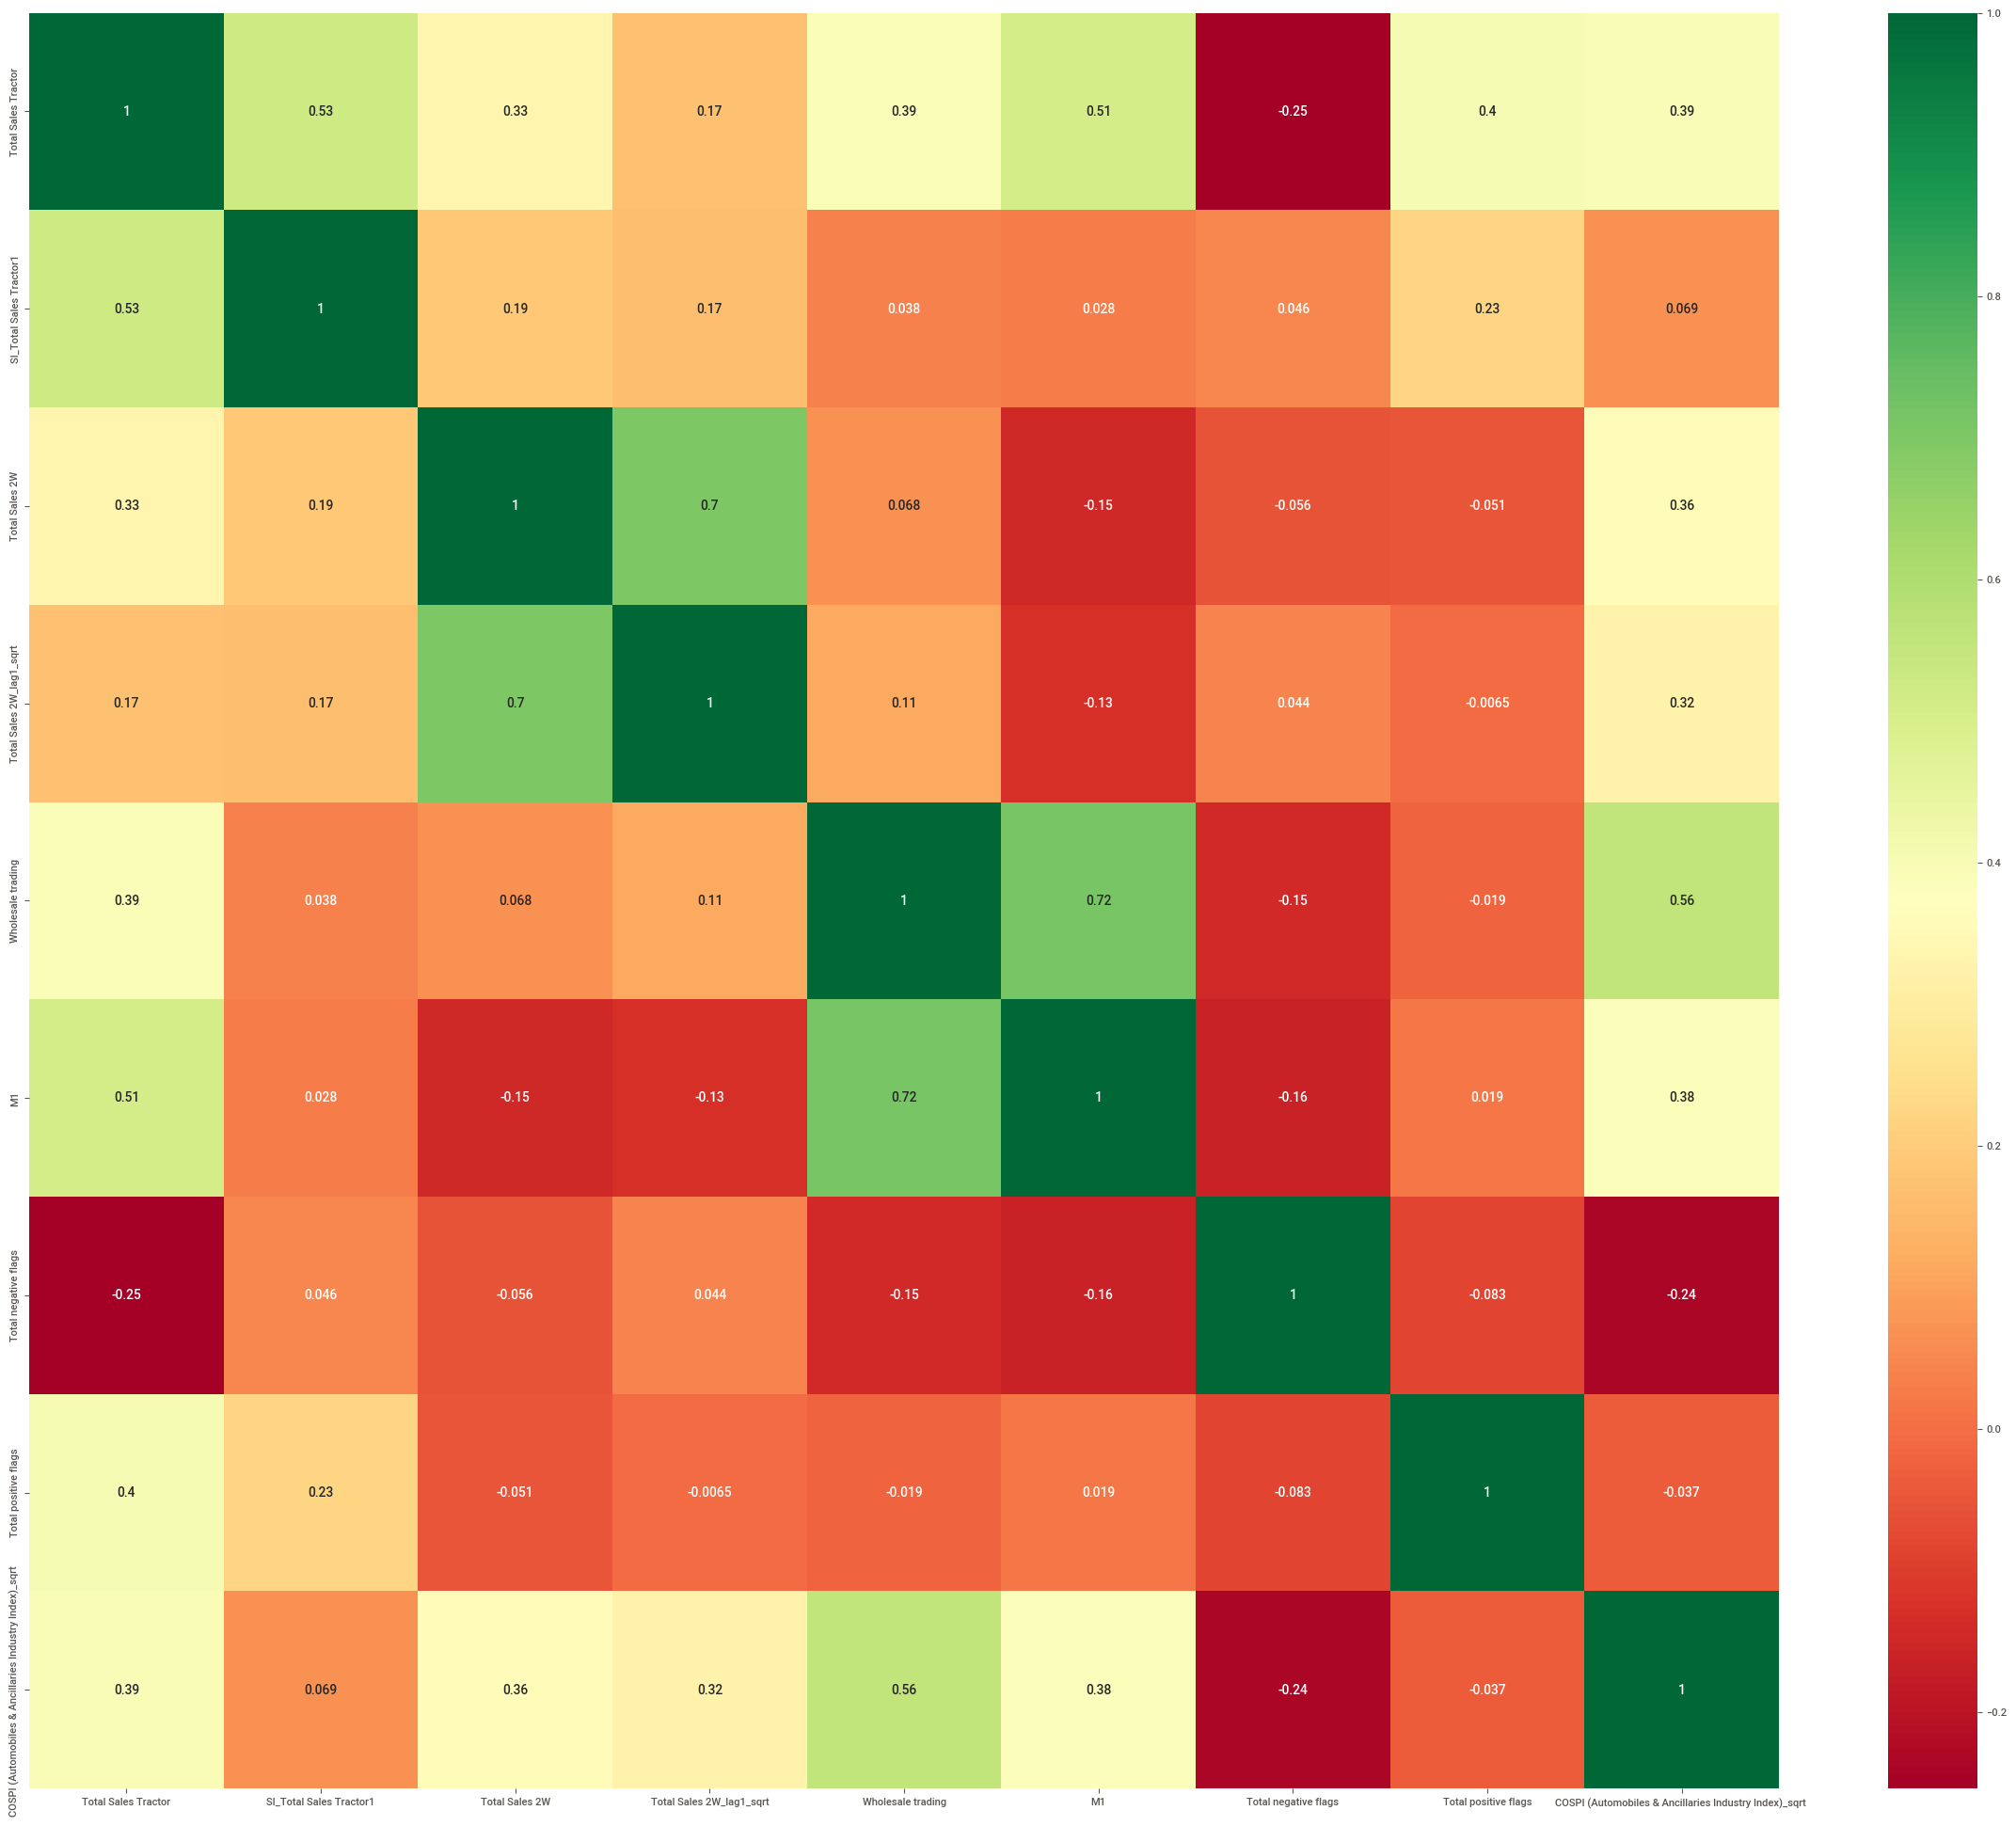

In [585]:

# calculate the correlation matrix
tractor1 = Tractor_after.corr()
#cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
# display the correlation matrix
#display(corr)
f, ax = plt.subplots(figsize=(30, 25))
# plot the correlation heatmap
sns.heatmap(tractor1, xticklabels=tractor1.columns, yticklabels=tractor1.columns, cmap='RdYlGn',annot= True,annot_kws={'fontsize':10})


<AxesSubplot: xlabel='SI_Total Sales Tractor1', ylabel='Total Sales Tractor'>

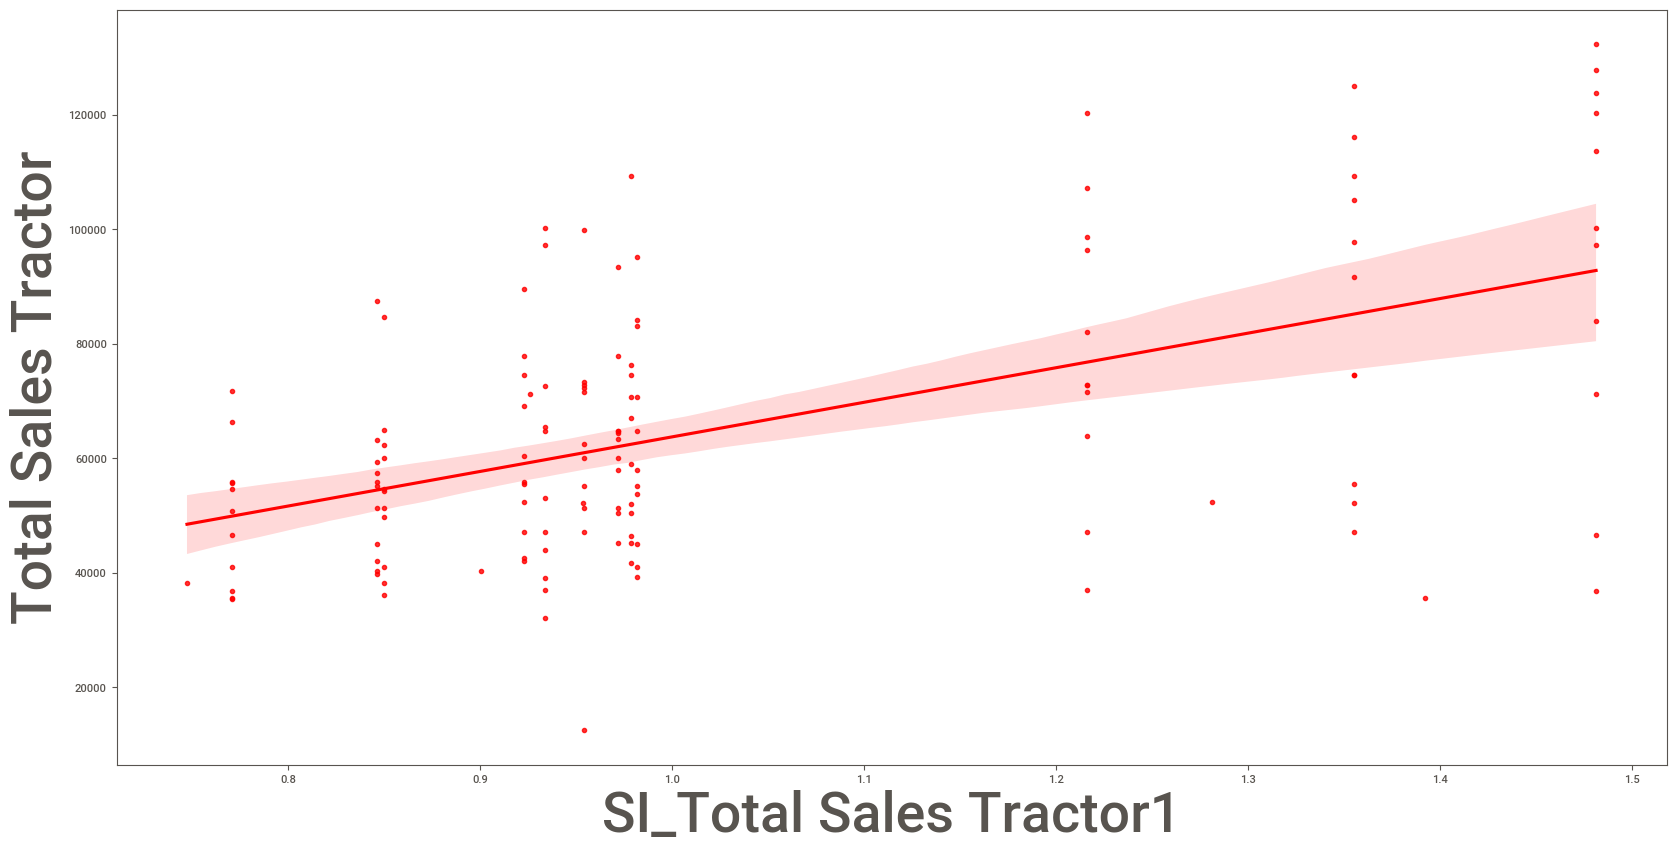

In [98]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="SI_Total Sales Tractor1", y = "Total Sales Tractor", data = Tractor_after, color= 'red')

<AxesSubplot: xlabel='Total Sales 2W_lag1_sqrt', ylabel='Total Sales Tractor'>

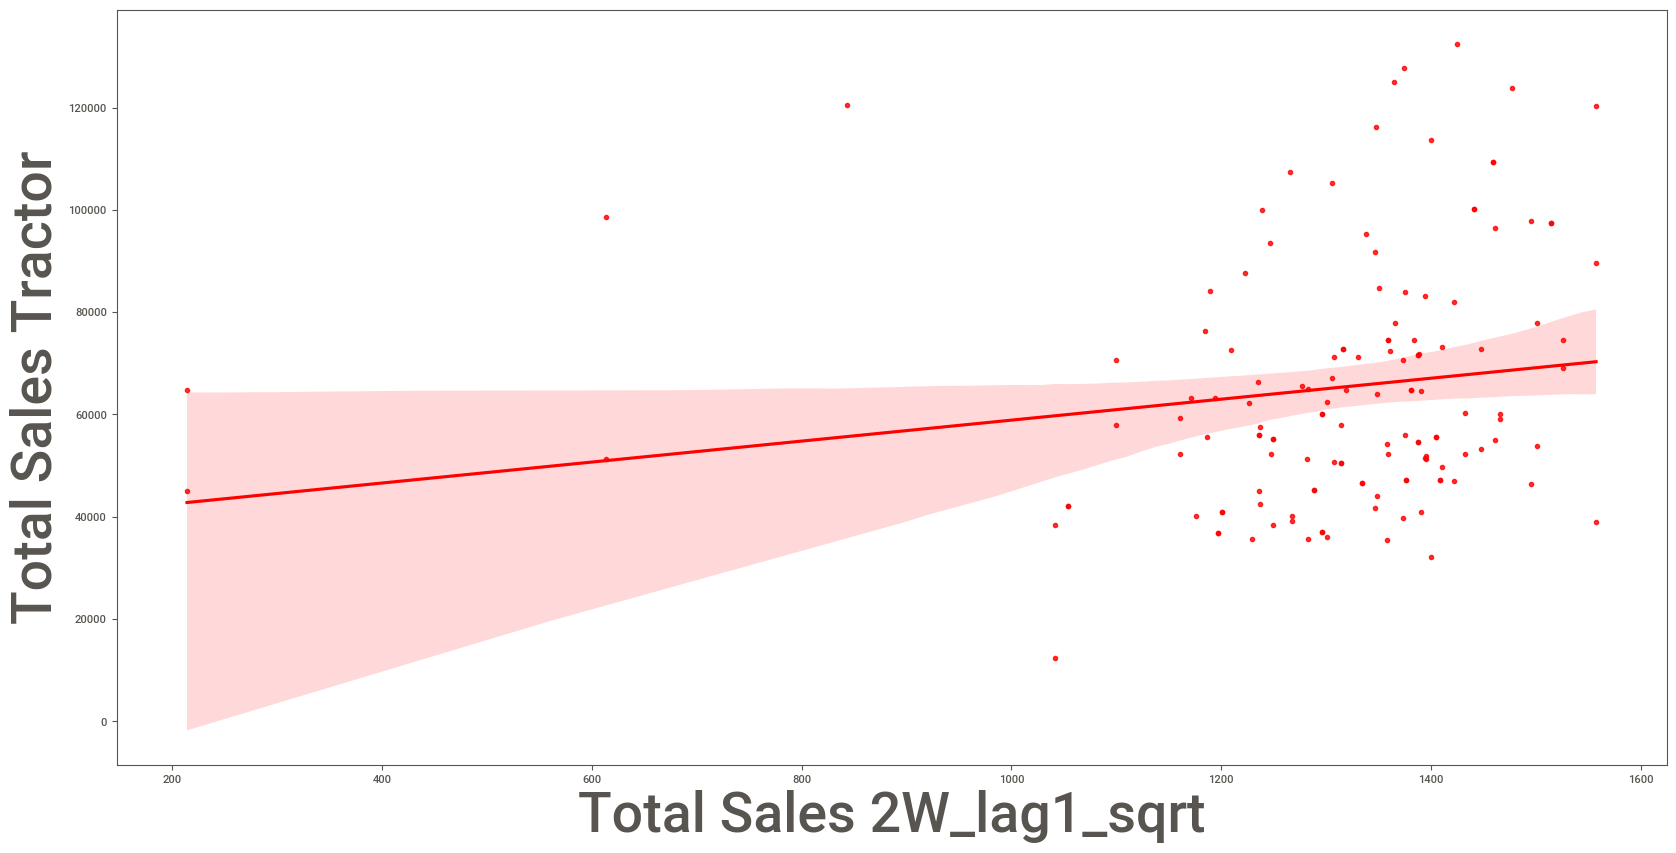

In [586]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="Total Sales 2W_lag1_sqrt", y = "Total Sales Tractor", data = Tractor_after, color= 'red')

<AxesSubplot: xlabel='Total Sales 2W', ylabel='Total Sales Tractor'>

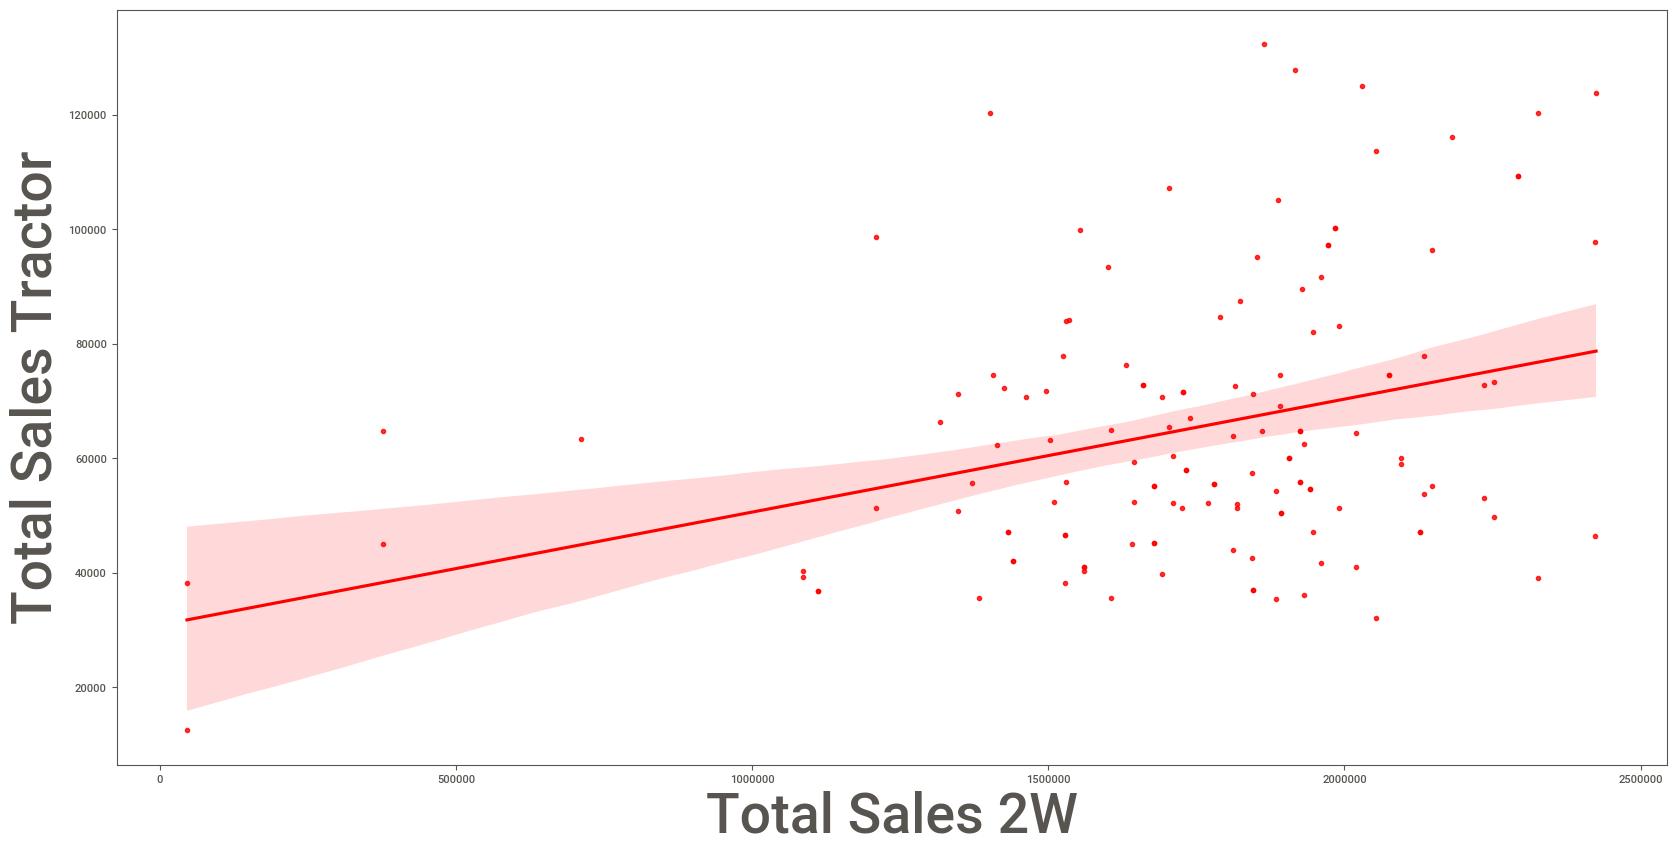

In [587]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="Total Sales 2W", y = "Total Sales Tractor", data = Tractor_after, color= 'red')

<AxesSubplot: xlabel='Wholesale trading', ylabel='Total Sales Tractor'>

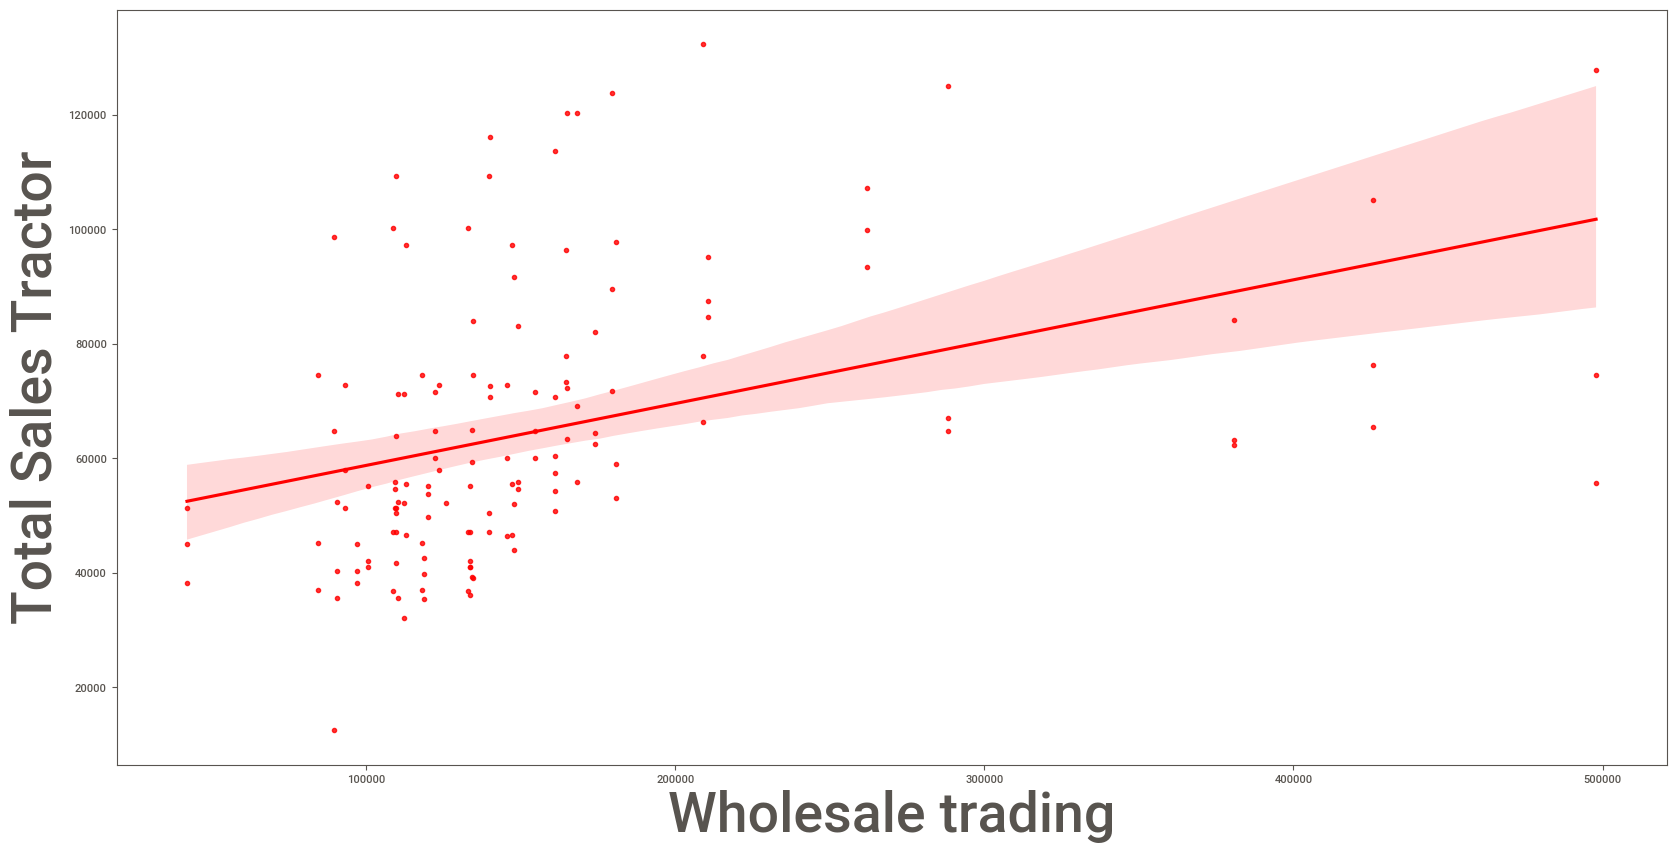

In [590]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="Wholesale trading", y = "Total Sales Tractor", data = Tractor_after, color= 'red')

<AxesSubplot: xlabel='M1', ylabel='Total Sales Tractor'>

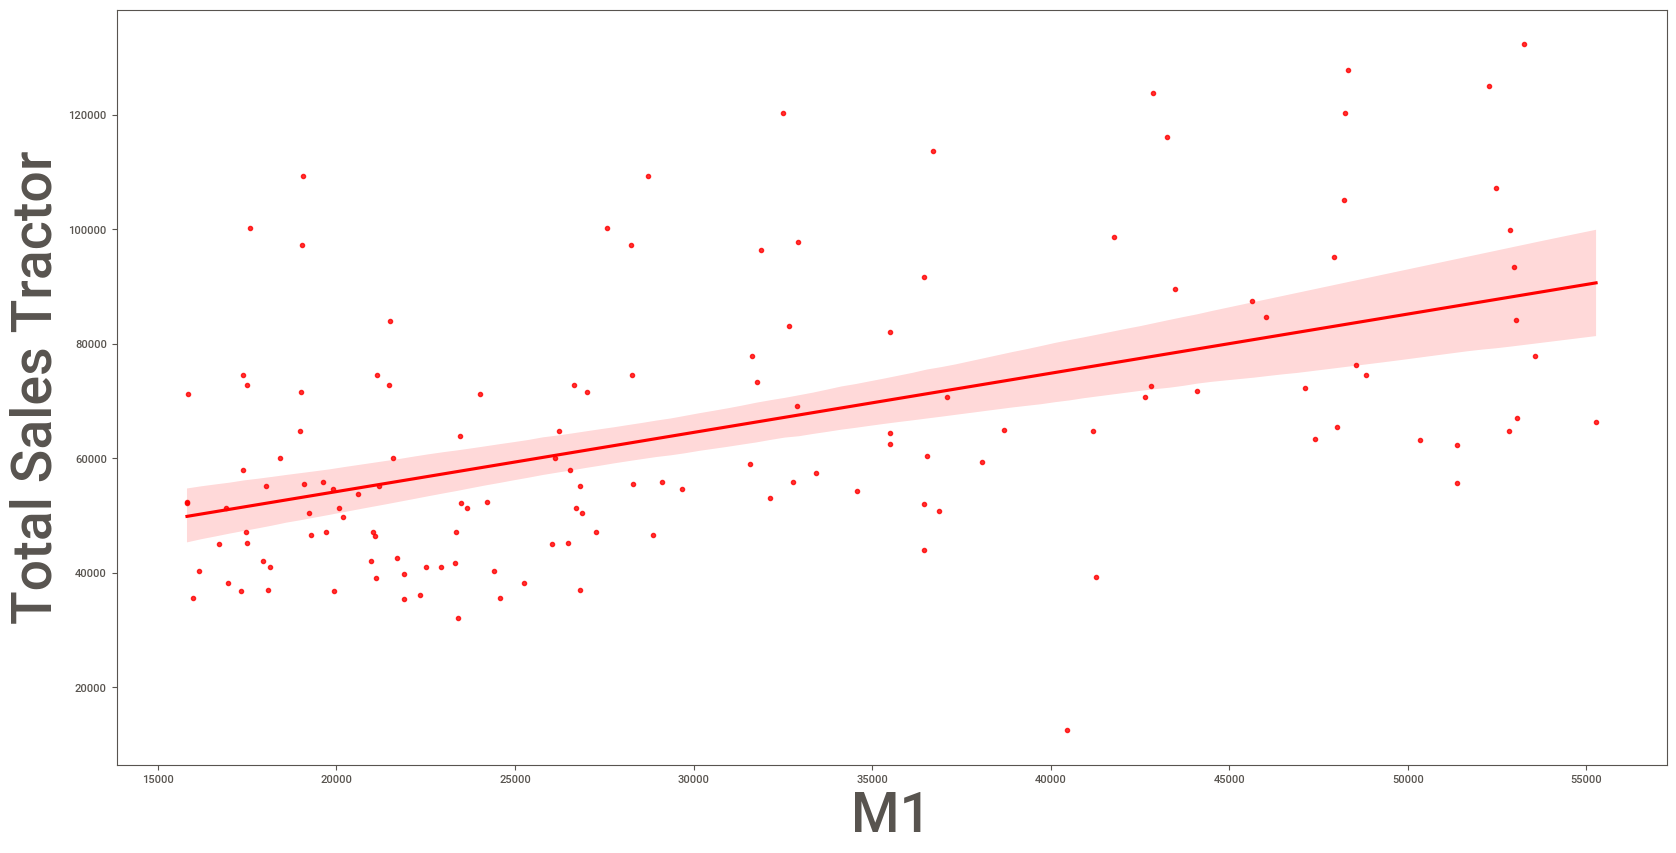

In [593]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="M1", y = "Total Sales Tractor", data = Tractor_after, color= 'red')

<AxesSubplot: xlabel='COSPI (Automobiles & Ancillaries Industry Index)_sqrt ', ylabel='Total Sales Tractor'>

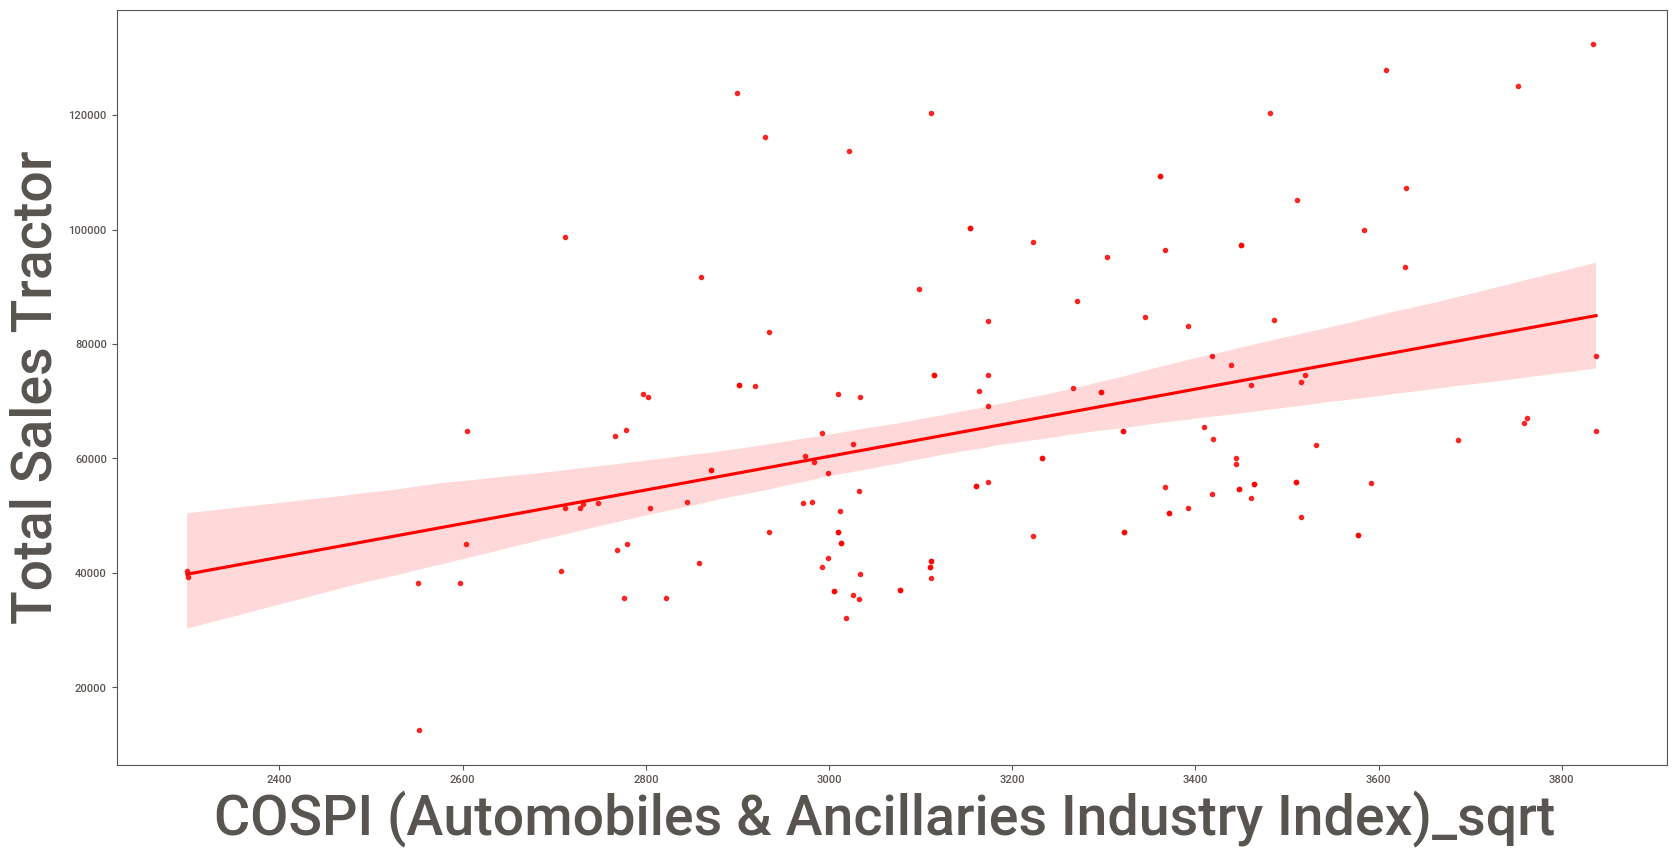

In [592]:
f, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x="COSPI (Automobiles & Ancillaries Industry Index)_sqrt ", y = "Total Sales Tractor", data = Tractor_after, color= 'red')

In [594]:
# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [595]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)
predict = regression_model.predict(X_train)
# Show the first 12 predictions
train_mape = ((abs((y_train-predict)/y_train)).mean())*100
test_mape = ((abs((y_test-y_predict)/y_test)).mean())*100
print("Train Mape in % is ...", train_mape)
print("Test Mape in % is ...", test_mape)

Train Mape in % is ... Total Sales Tractor    17.795868
dtype: float64
Test Mape in % is ... Total Sales Tractor    16.161904
dtype: float64


In [597]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -4.627e+04
----------------------------------------------------------------------------------------------------
The Coefficient for Domestic cargo/freight handled  is 4.4e+04
The Coefficient for MSP Kharif Season is 0.025
The Coefficient for MSP Rabi Season is -2.3e+01
The Coefficient for MOM:Live storage at full  reservoir level  (FRL) is 0.053
The Coefficient for MOM:Current live storage  is 0.83
The Coefficient for MOM:Current live storage ,As % of live storage  at FRL  is -7.5e+03
The Coefficient for Rainfall in mm is 1.6e+04
The Coefficient for Rainfall in mm_lag1 is 5.9


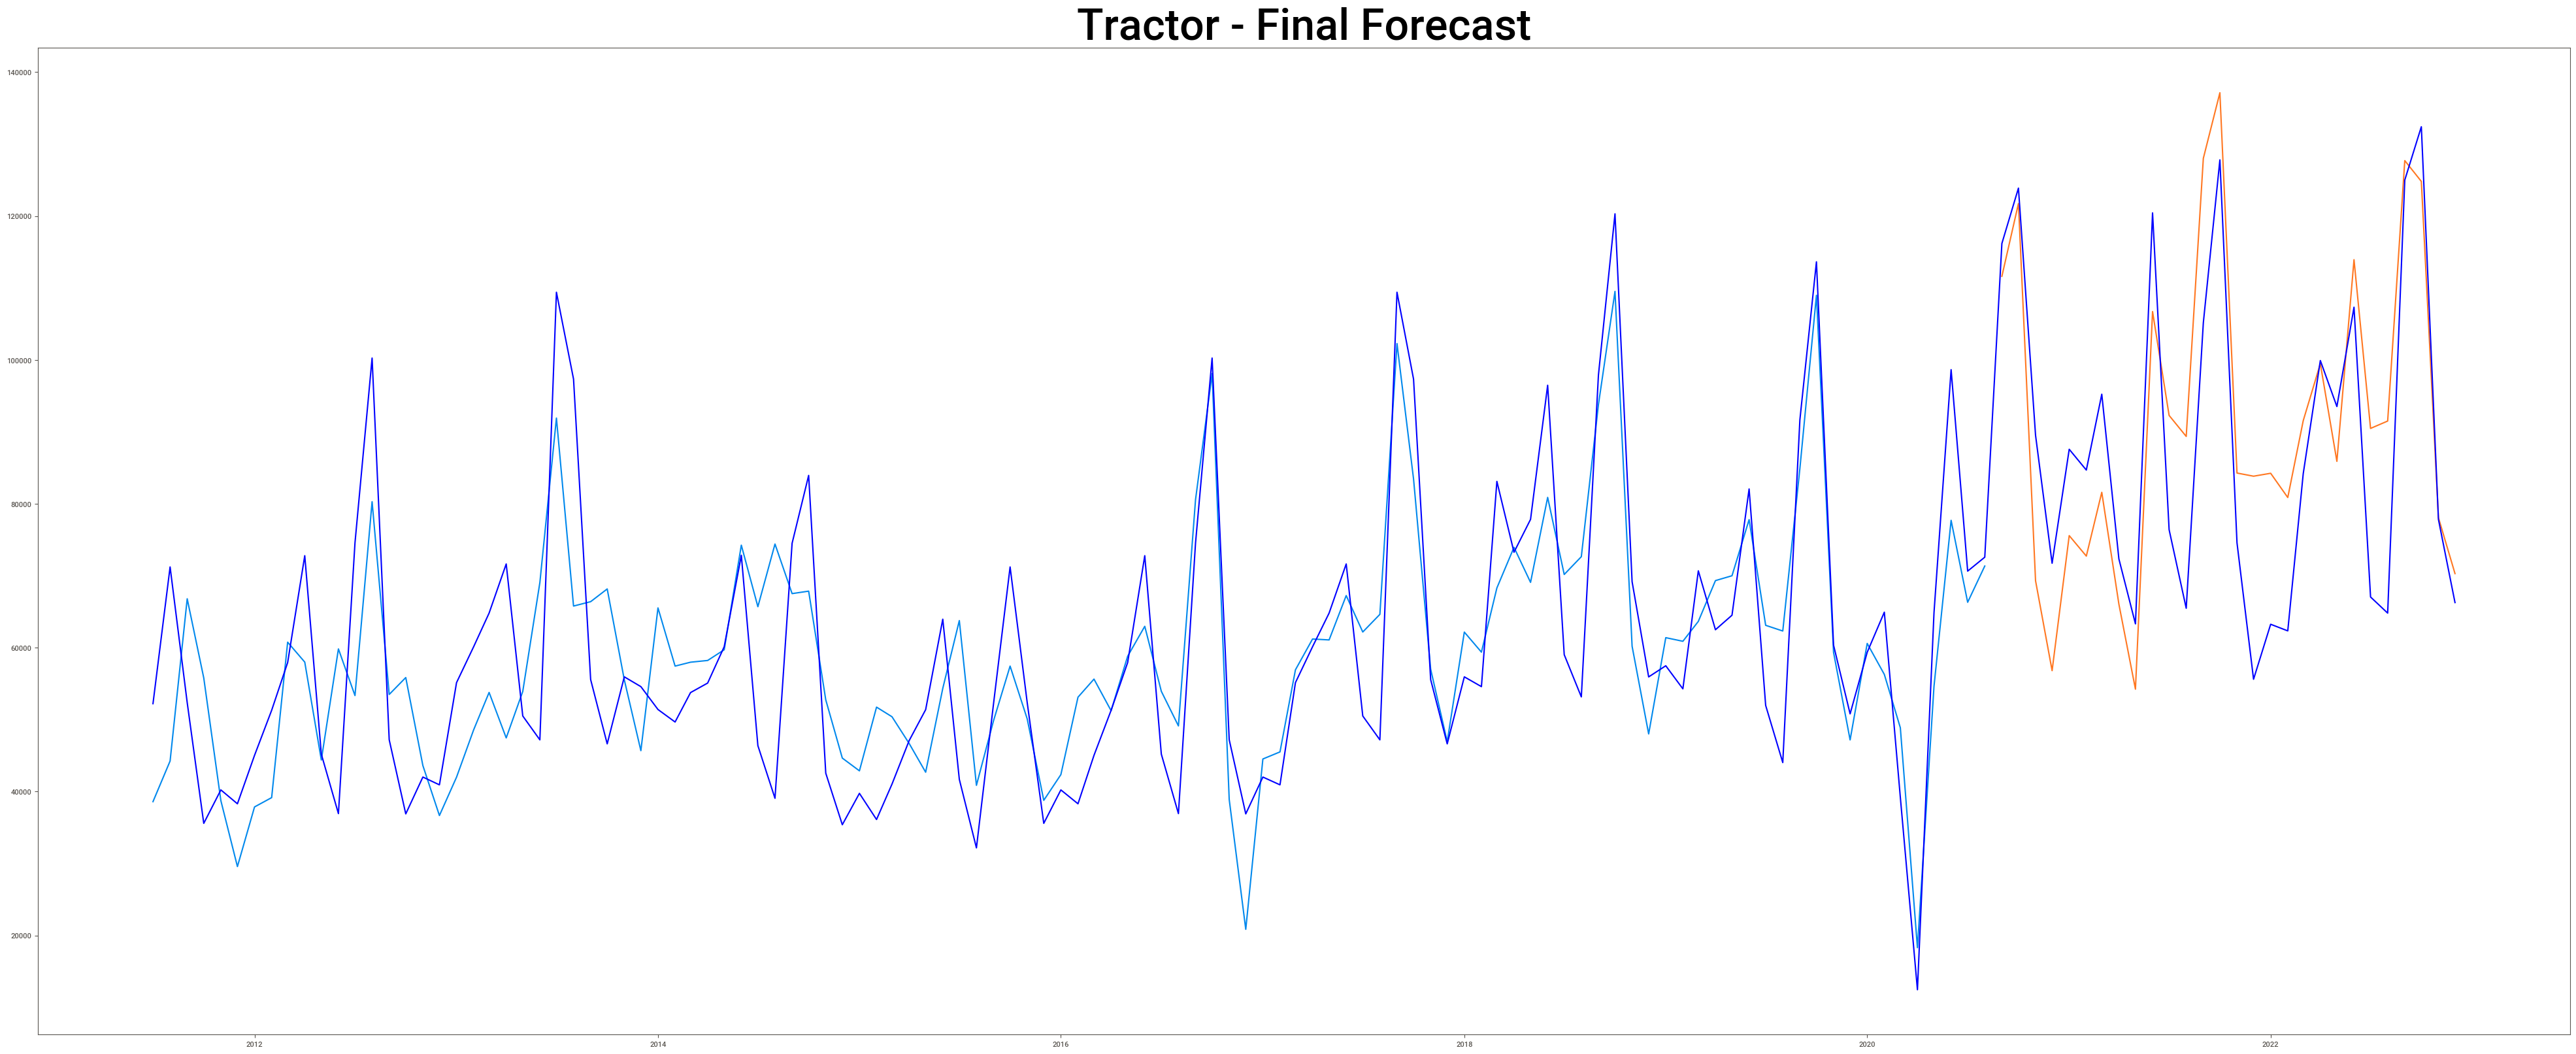

In [598]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 20
plt.plot(X_train.index,predict)
plt.plot(X_test.index,y_predict)
plt.plot(X.index,y,color = 'blue')
plt.title("Tractor - Final Forecast")
plt.show()

In [599]:
from sklearn.preprocessing import MinMaxScaler
X4 = X3
scaler = MinMaxScaler()
print(scaler.fit(X4))
MinMaxScaler()
print(scaler.data_max_)
X5 = scaler.transform(X4)

MinMaxScaler()
[1.48129443e+00 2.42482700e+06 1.55718560e+03 4.97911000e+05
 5.52710000e+04 2.00000000e+00 3.00000000e+00 3.83752786e+03]


In [600]:
from sklearn.preprocessing import MinMaxScaler
Y4 = Y3
scaler = MinMaxScaler()
print(scaler.fit(Y4))
MinMaxScaler()
print(scaler.data_max_)
Y5 = scaler.transform(Y4)

MinMaxScaler()
[132413.]


In [601]:
# Split X and y into X_
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X5_train, y5_train)

LinearRegression()

In [602]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X3.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -0.05178
----------------------------------------------------------------------------------------------------
The Coefficient for SI_Total Sales Tractor1 is 0.25
The Coefficient for Total Sales 2W is 0.54
The Coefficient for Total Sales 2W_lag1_sqrt is -0.19
The Coefficient for Wholesale trading is -0.095
The Coefficient for M1 is 0.38
The Coefficient for Total negative flags is -0.099
The Coefficient for Total positive flags is 0.42
The Coefficient for COSPI (Automobiles & Ancillaries Industry Index)_sqrt  is 0.047
